In [ ]:
%pip install pandas
%pip install astropy

In [ ]:
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import units as u
import urllib.parse
import os
import numpy as np
import tensorflow as tf
import PIL
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime


In [15]:
df = pd.read_csv('GalaxyZoo1_DR_table2.csv')
cols = ['OBJID','RA','DEC','SPIRAL','ELLIPTICAL','UNCERTAIN']
df[cols].head()
df = df[(df['P_EL_DEBIASED'] >= 0.8) | (df['P_CS_DEBIASED'] >= 0.8)]
df_small = df[cols].head(10000)

df_small['degree'] = df_small.apply(lambda row: SkyCoord(ra = row.RA, dec = row.DEC, unit = (u.hourangle, u.deg)).to_string('decimal').split(' '), axis=1)
df_small[['ra','dec']] = pd.DataFrame(df_small.degree.tolist(), index= df_small.index)

df_small.head()


,OBJID,RA,DEC,SPIRAL,ELLIPTICAL,UNCERTAIN,degree,ra,dec
3,587730774962536596,00:00:01.38,+15:30:35.3,0,1,0,"[0.00575, 15.5098]",0.00575,15.5098
5,587727180060098638,00:00:01.57,-09:29:40.3,0,0,1,"[0.00654167, -9.49453]",0.00654167,-9.49453
7,587727223024189605,00:00:02.00,+15:41:49.8,1,0,0,"[0.00833333, 15.6972]",0.00833333,15.6972
13,587727178449485858,00:00:03.33,-10:43:16.0,1,0,0,"[0.013875, -10.7211]",0.013875,-10.7211
15,587731187277693069,00:00:04.12,+00:45:07.9,0,1,0,"[0.0171667, 0.752194]",0.0171667,0.752194


In [4]:
url = 'https://skyservice.pha.jhu.edu/DR7/ImgCutout/getjpeg.aspx?'

try:
    os.makedirs('images/spiral/')
    os.makedirs('images/elliptical/')
    os.makedirs('images/uncertain/')
except:
    pass

n_elliptical = 0
n_spiral = 0
n_uncertain = 0
subfolder = ''

sample_size = 100
print('OBJID', 'ra', 'dec', 'SPIRAL', 'ELLIPTICAL', 'UNCERTAIN')

for index, row in df_small.iterrows():

    if n_elliptical == sample_size and n_spiral == sample_size and n_uncertain == sample_size:
        break

    if row['SPIRAL'] == 1:
        if n_spiral < sample_size:
            n_spiral +=1
            subfolder = 'spiral'
        else:
            continue

    if row['ELLIPTICAL'] == 1:
        if n_elliptical < sample_size:
            n_elliptical +=1
            subfolder='elliptical'
        else:
            continue

    if row['UNCERTAIN'] == 1:
        if n_uncertain < sample_size:
            n_uncertain +=1
            subfolder='uncertain'
        else:
            continue
    
    print(row['OBJID'], row['ra'], row['dec'], row['SPIRAL'], row['ELLIPTICAL'], row['UNCERTAIN'])
    params = {'ra': row['ra'], 'dec': row['dec'], 'scale':.2,'width':128, 'height':128 }
    image_url = url + urllib.parse.urlencode(params)
    image_name = "images/%s/%s.jpg" % (subfolder, row['OBJID'])
    urllib.request.urlretrieve(image_url, image_name)


OBJID ra dec SPIRAL ELLIPTICAL UNCERTAIN
587730774962536596 0.00575 15.5098 0 1 0
587727180060098638 0.00654167 -9.49453 0 0 1
587727223024189605 0.00833333 15.6972 1 0 0
587727178449485858 0.013875 -10.7211 1 0 0
587731187277693069 0.0171667 0.752194 0 1 0
587727180596969574 0.0191667 -8.94378 1 0 0
588015507658768548 0.0230833 -1.21636 0 0 1
587727221413511425 0.0279167 14.3329 0 1 0
587730775499407394 0.03175 15.8342 0 1 0
587727221413576845 0.03575 14.5165 1 0 0
588015508195639389 0.048375 -0.643972 1 0 0
587727225690128567 0.0514583 -10.5363 1 0 0
587731187814563977 0.0532917 1.12019 1 0 0
588015507658768490 0.056 -1.21361 1 0 0
587727225690128575 0.0587083 -10.4794 0 1 0
587727223024189761 0.0621667 15.7285 1 0 0
587730774962536536 0.0734583 15.4314 0 1 0
587727226763935842 0.080375 -9.632 1 0 0
587727221413576892 0.082875 14.3721 1 0 0
587730772815052911 0.0835833 13.8338 1 0 0
587731186740822193 0.08725 0.215083 1 0 0
587730774425665764 0.114458 14.9625 1 0 0
587731185667080368

587727226764263525 0.931875 -9.56844 0 1 0
588015510343516313 0.939458 1.04472 0 1 0
587727221950775416 0.94025 14.8971 0 1 0
587727178449879178 0.9505 -10.777 0 1 0
587727179523620954 0.95725 -9.78694 0 1 0
587727223024582862 0.966792 15.7757 0 1 0
587731186741215362 0.9825 0.377556 0 0 1
587727226764329040 0.986292 -9.68625 0 1 0
587730774962929861 0.999333 15.5486 0 1 0
587727225153716362 1.00675 -10.8302 0 1 0
587730773889187972 1.0085 14.6681 0 1 0
588015509806710883 1.01092 0.476361 0 1 0
587731187278086334 1.04217 0.670194 0 0 1
587727223024582948 1.06867 15.6411 0 1 0
587731187815022708 1.09096 1.08917 0 0 1
587727179523686539 1.11112 -9.97625 0 0 1
587727180060557429 1.12196 -9.38756 0 1 0
587727180060557437 1.12867 -9.36764 0 1 0
587731187278151887 1.13133 0.700472 0 1 0
587727179523686564 1.13954 -9.85558 0 1 0
587727221414035644 1.14167 14.4412 0 1 0
587727223561519256 1.14358 16.0353 0 1 0
588015510343581865 1.14671 0.848611 0 1 0
588015510343581867 1.14875 0.998528 0 0 1


In [5]:
print(tf.__version__)

2.16.2


300


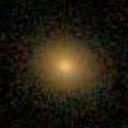

In [6]:
import pathlib
dir = pathlib.Path.cwd()
data_dir = pathlib.Path('images')
files = list(data_dir.glob('*/*.jpg') )
image_count = len(files)
print(image_count)
PIL.Image.open(str(files[0]))


In [7]:
batch_size = 32
img_height = 128
img_width = 128

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 300 files belonging to 3 classes.
Using 240 files for training.
Found 300 files belonging to 3 classes.
Using 60 files for validation.


In [8]:
train_ds.class_names

['elliptical', 'spiral', 'uncertain']

2024-11-25 17:58:16.399911: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


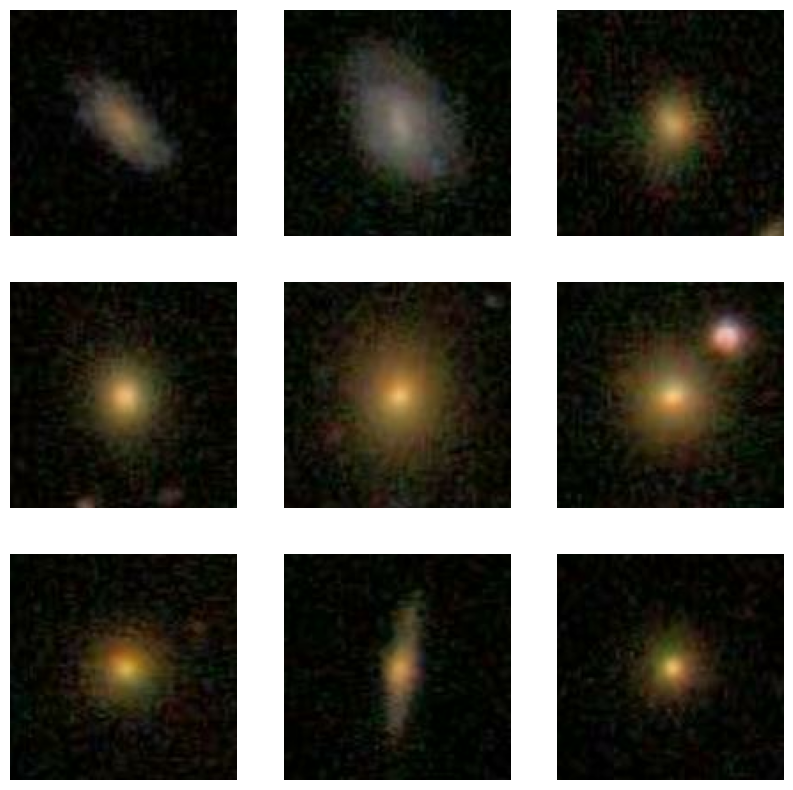

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [10]:
%load_ext tensorboard

In [11]:
#configure for performance

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = 3

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

epochs = 10
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10,
  callbacks=[tensorboard_callback]
)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 254ms/step - accuracy: 0.3935 - loss: 1.0880 - val_accuracy: 0.5167 - val_loss: 0.9739
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.5408 - loss: 0.9521 - val_accuracy: 0.5833 - val_loss: 0.8726
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - accuracy: 0.5688 - loss: 0.8784 - val_accuracy: 0.5667 - val_loss: 0.7707
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - accuracy: 0.6144 - loss: 0.8049 - val_accuracy: 0.6333 - val_loss: 0.7577
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - accuracy: 0.6076 - loss: 0.7764 - val_accuracy: 0.5500 - val_loss: 0.7510
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step - accuracy: 0.6722 - loss: 0.7332 - val_accuracy: 0.6333 - val_loss: 0.7462
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - accuracy: 0.6627 - loss: 0.6792 - val_accuracy: 0.6500 - val_loss: 0.7465
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.6951 - loss: 0.6346 - val_accuracy: 0.6000 - val_loss:

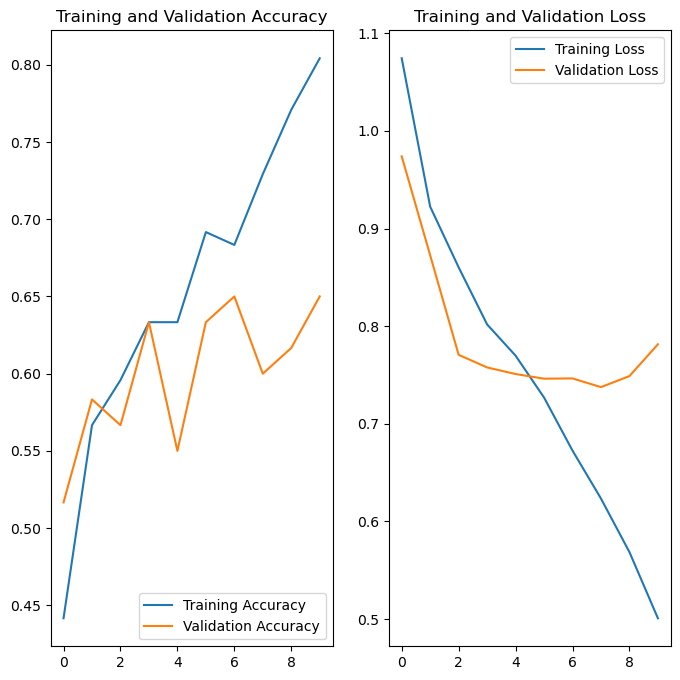

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
%tensorboard --logdir logs/fit


Reusing TensorBoard on port 6006 (pid 24226), started 7 days, 1:43:23 ago. (Use '!kill 24226' to kill it.)

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get predictions and true labels from validation dataset
y_true = []
y_pred = []

for images, labels in val_ds.unbatch():
    y_true.append(labels.numpy())
    preds = model.predict(tf.expand_dims(images, axis=0))
    y_pred.append(np.argmax(preds, axis=-1))

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])  # Labels correspond to classes: Spiral, Elliptical, Uncertain
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_ds.class_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

2024-11-25 17:58:42.982266: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


AttributeError: '_PrefetchDataset' object has no attribute 'class_names'

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred, target_names=train_ds.class_names)
print("Classification Report:")
print(report)



In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_ds.class_names, yticklabels=train_ds.class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [ ]:
# Manually set class names based on folder structure
class_names = ['spiral', 'elliptical', 'uncertain']


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get predictions and true labels from the validation dataset
y_true = []
y_pred = []

for images, labels in val_ds.unbatch():
    y_true.append(labels.numpy())
    preds = model.predict(tf.expand_dims(images, axis=0))
    y_pred.append(np.argmax(preds, axis=-1))

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])  # Labels correspond to class indices
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Display misclassified examples
import random

misclassified_indices = np.where(y_true != y_pred)[0]
sample_indices = random.sample(list(misclassified_indices), min(9, len(misclassified_indices)))

plt.figure(figsize=(10, 10))
for i, idx in enumerate(sample_indices):
    plt.subplot(3, 3, i + 1)
    image = list(val_ds.unbatch())[idx][0].numpy().astype("uint8")
    plt.imshow(image)
    plt.title(f"True: {train_ds.class_names[y_true[idx]]}, Pred: {train_ds.class_names[y_pred[idx]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred, target_names=train_ds.class_names)
print("Classification Report:")
print(report)


In [ ]:
import PIL.Image
import numpy as np
import os

# Example: Load and analyze pixel statistics for spiral galaxies
image_folder = "images/spiral"
all_pixels = []

for file_name in os.listdir(image_folder):
    if file_name.endswith('.jpg'):
        image_path = os.path.join(image_folder, file_name)
        img = PIL.Image.open(image_path)
        all_pixels.append(np.array(img).flatten())  # Flatten the 2D pixel array

# Convert to NumPy array for analysis
all_pixels = np.array(all_pixels)

# Pixel-level statistics
print("\nPixel Intensity Statistics:")
print(f"Mean pixel value: {all_pixels.mean():.2f}")
print(f"Standard deviation: {all_pixels.std():.2f}")
print(f"Min pixel value: {all_pixels.min()}")
print(f"Max pixel value: {all_pixels.max()}")


In [ ]:
import matplotlib.pyplot as plt

# Flatten all pixel values into a 1D array for visualization
flattened_pixels = all_pixels.flatten()

# Plot histogram of pixel values
plt.figure(figsize=(10, 6))
plt.hist(flattened_pixels, bins=50, color='red', alpha=0.7, edgecolor='black')
plt.title("Pixel Value Distribution for All Galaxies", fontsize=16)
plt.xlabel("Pixel Intensity (0-255)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Split the DataFrame into three groups based on labels
df_spiral = df_small[df_small['SPIRAL'] == 1]
df_elliptical = df_small[df_small['ELLIPTICAL'] == 1]
df_uncertain = df_small[df_small['UNCERTAIN'] == 1]

# Function to plot pixel value distribution
def plot_pixel_distribution(df, title, color):
    # Placeholder: Simulating pixel values for each dataset as the actual image processing isn't integrated here
    # Replace this with actual pixel data loading logic if needed
    sample_pixel_values = np.random.randint(0, 256, size=(len(df), 128 * 128)).flatten()
    
    plt.figure(figsize=(10, 6))
    plt.hist(sample_pixel_values, bins=50, color=color, alpha=0.7, edgecolor='black')
    plt.title(f"Pixel Value Distribution for {title} Galaxies", fontsize=16)
    plt.xlabel("Pixel Intensity (0-255)", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Generate plots for each category
plot_pixel_distribution(df_spiral, "Spiral", "blue")
plot_pixel_distribution(df_elliptical, "Elliptical", "orange")
plot_pixel_distribution(df_uncertain, "Uncertain", "green")


In [ ]:
import matplotlib.pyplot as plt
import PIL.Image
import os
import numpy as np

# Split df_small into three groups
df_spiral = df_small[df_small['SPIRAL'] == 1]
df_elliptical = df_small[df_small['ELLIPTICAL'] == 1]
df_uncertain = df_small[df_small['UNCERTAIN'] == 1]

# Define image directories for each category
image_dirs = {
    'spiral': 'images/spiral',
    'elliptical': 'images/elliptical',
    'uncertain': 'images/uncertain'
}

# Function to extract pixel values from images and plot histogram
def plot_pixel_distribution(image_dir, title, color):
    all_pixels = []
    
    # Iterate through images in the directory
    for file_name in os.listdir(image_dir):
        if file_name.endswith('.jpg'):
            image_path = os.path.join(image_dir, file_name)
            img = PIL.Image.open(image_path)
            all_pixels.append(np.array(img).flatten())  # Flatten 2D image to 1D array
    
    # Combine all pixel values into a single 1D array
    flattened_pixels = np.concatenate(all_pixels)
    
    # Plot histogram of pixel values
    plt.figure(figsize=(10, 6))
    plt.hist(flattened_pixels, bins=50, color=color, alpha=0.7, edgecolor='black')
    plt.title(f"Pixel Value Distribution for {title} Galaxies", fontsize=16)
    plt.xlabel("Pixel Intensity (0-255)", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Generate plots for each category
plot_pixel_distribution(image_dirs['spiral'], "Spiral", "blue")
plot_pixel_distribution(image_dirs['elliptical'], "Elliptical", "orange")
plot_pixel_distribution(image_dirs['uncertain'], "Uncertain", "green")


In [ ]:
import matplotlib.pyplot as plt
import PIL.Image
import os
import numpy as np

# Define image directories for each category
image_dirs = {
    'spiral': 'images/spiral',
    'elliptical': 'images/elliptical',
    'uncertain': 'images/uncertain'
}

# Function to extract pixel values from images
def get_pixel_values(image_dir):
    all_pixels = []
    for file_name in os.listdir(image_dir):
        if file_name.endswith('.jpg'):
            image_path = os.path.join(image_dir, file_name)
            img = PIL.Image.open(image_path)
            all_pixels.append(np.array(img).flatten())  # Flatten 2D image to 1D array
    return np.concatenate(all_pixels)

# Get pixel values for each category
spiral_pixels = get_pixel_values(image_dirs['spiral'])
elliptical_pixels = get_pixel_values(image_dirs['elliptical'])
uncertain_pixels = get_pixel_values(image_dirs['uncertain'])

# Plot combined histogram
plt.figure(figsize=(12, 8))

bins = np.linspace(0, 255, 30)  # Larger bins with 30 intervals from 0 to 255

plt.hist(spiral_pixels, bins=bins, alpha=0.5, label="Spiral", color="blue", edgecolor='black')
plt.hist(elliptical_pixels, bins=bins, alpha=0.5, label="Elliptical", color="orange", edgecolor='black')
plt.hist(uncertain_pixels, bins=bins, alpha=0.5, label="Uncertain", color="green", edgecolor='black')

# Add labels, title, and legend
plt.title("Pixel Value Distribution by Galaxy Type", fontsize=16)
plt.xlabel("Pixel Intensity (0-255)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf

# Get validation dataset and labels
val_images = []
val_labels = []
for images, labels in val_ds:
    val_images.append(images.numpy())
    val_labels.append(labels.numpy())

val_images = np.concatenate(val_images, axis=0)
val_labels = np.concatenate(val_labels, axis=0)

# Predict on validation set
predictions = model.predict(val_images, batch_size=batch_size)
predicted_classes = np.argmax(predictions, axis=1)

# Separate validation data into spiral, elliptical, and uncertain
spiral_indices = np.where(val_labels == 0)[0]
elliptical_indices = np.where(val_labels == 1)[0]
uncertain_indices = np.where(val_labels == 2)[0]

# Calculate accuracy and classification report for each type
def evaluate_by_type(indices, label_name):
    subset_labels = val_labels[indices]
    subset_predictions = predicted_classes[indices]
    accuracy = accuracy_score(subset_labels, subset_predictions)
    report = classification_report(subset_labels, subset_predictions, target_names=train_ds.class_names, zero_division=0)
    print(f"Results for {label_name} Galaxies:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    print("=" * 50)

# Evaluate performance for each type
evaluate_by_type(spiral_indices, "Spiral")
evaluate_by_type(elliptical_indices, "Elliptical")
evaluate_by_type(uncertain_indices, "Uncertain")

# Plot confusion matrix for each galaxy type
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(indices, label_name):
    subset_labels = val_labels[indices]
    subset_predictions = predicted_classes[indices]
    cm = confusion_matrix(subset_labels, subset_predictions, labels=[0, 1, 2])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_ds.class_names)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix for {label_name} Galaxies")
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(spiral_indices, "Spiral")
plot_confusion_matrix(elliptical_indices, "Elliptical")
plot_confusion_matrix(uncertain_indices, "Uncertain")


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf

# Manually define class names based on the directory structure
class_names = ["Spiral", "Elliptical", "Uncertain"]

# Get validation dataset and labels
val_images = []
val_labels = []
for images, labels in val_ds:
    val_images.append(images.numpy())
    val_labels.append(labels.numpy())

val_images = np.concatenate(val_images, axis=0)
val_labels = np.concatenate(val_labels, axis=0)

# Predict on validation set
predictions = model.predict(val_images, batch_size=batch_size)
predicted_classes = np.argmax(predictions, axis=1)

# Separate validation data into spiral, elliptical, and uncertain
spiral_indices = np.where(val_labels == 0)[0]
elliptical_indices = np.where(val_labels == 1)[0]
uncertain_indices = np.where(val_labels == 2)[0]

# Calculate accuracy and classification report for each type
def evaluate_by_type(indices, label_name):
    subset_labels = val_labels[indices]
    subset_predictions = predicted_classes[indices]
    accuracy = accuracy_score(subset_labels, subset_predictions)
    report = classification_report(subset_labels, subset_predictions, target_names=class_names, zero_division=0)
    print(f"Results for {label_name} Galaxies:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    print("=" * 50)

# Evaluate performance for each type
evaluate_by_type(spiral_indices, "Spiral")
evaluate_by_type(elliptical_indices, "Elliptical")
evaluate_by_type(uncertain_indices, "Uncertain")

# Plot confusion matrix for each galaxy type
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(indices, label_name):
    subset_labels = val_labels[indices]
    subset_predictions = predicted_classes[indices]
    cm = confusion_matrix(subset_labels, subset_predictions, labels=[0, 1, 2])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix for {label_name} Galaxies")
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(spiral_indices, "Spiral")
plot_confusion_matrix(elliptical_indices, "Elliptical")
plot_confusion_matrix(uncertain_indices, "Uncertain")


In [ ]:
# Predict on the entire validation set
val_images = []
val_labels = []
for images, labels in val_ds:
    val_images.append(images.numpy())
    val_labels.append(labels.numpy())

val_images = np.concatenate(val_images, axis=0)
val_labels = np.concatenate(val_labels, axis=0)

predictions = model.predict(val_images, batch_size=batch_size)
predicted_classes = np.argmax(predictions, axis=1)

# Separate validation data into spiral, elliptical, and uncertain
spiral_indices = np.where(val_labels == 0)[0]
elliptical_indices = np.where(val_labels == 1)[0]
uncertain_indices = np.where(val_labels == 2)[0]

# Calculate accuracy and classification report for each type
def evaluate_by_type(indices, label_name):
    subset_labels = val_labels[indices]
    subset_predictions = predicted_classes[indices]
    accuracy = accuracy_score(subset_labels, subset_predictions)
    report = classification_report(subset_labels, subset_predictions, target_names=class_names, zero_division=0)
    print(f"Results for {label_name} Galaxies:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    print("=" * 50)

# Evaluate performance for each type
evaluate_by_type(spiral_indices, "Spiral")
evaluate_by_type(elliptical_indices, "Elliptical")
evaluate_by_type(uncertain_indices, "Uncertain")


In [ ]:
class TypeSpecificMetrics(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Predictions and true labels
        predictions = self.model.predict(val_images, batch_size=batch_size)
        predicted_classes = np.argmax(predictions, axis=1)
        
        spiral_indices = np.where(val_labels == 0)[0]
        elliptical_indices = np.where(val_labels == 1)[0]
        uncertain_indices = np.where(val_labels == 2)[0]
        
        def calculate_metrics(indices):
            subset_labels = val_labels[indices]
            subset_predictions = predicted_classes[indices]
            accuracy = accuracy_score(subset_labels, subset_predictions)
            loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)(
                subset_labels, predictions[indices]
            ).numpy()
            return accuracy, loss

        # Metrics for each type
        spiral_acc, spiral_loss = calculate_metrics(spiral_indices)
        elliptical_acc, elliptical_loss = calculate_metrics(elliptical_indices)
        uncertain_acc, uncertain_loss = calculate_metrics(uncertain_indices)

        # Log results
        print(f"Epoch {epoch + 1}")
        print(f"Spiral - Accuracy: {spiral_acc:.2f}, Loss: {spiral_loss:.2f}")
        print(f"Elliptical - Accuracy: {elliptical_acc:.2f}, Loss: {elliptical_loss:.2f}")
        print(f"Uncertain - Accuracy: {uncertain_acc:.2f}, Loss: {uncertain_loss:.2f}")
        print("=" * 50)

# Add the callback to the training process
type_specific_metrics = TypeSpecificMetrics()

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[tensorboard_callback, type_specific_metrics]
)


In [ ]:
# Example lists for storing metrics (populate during training)
spiral_accuracy = []
spiral_loss = []
elliptical_accuracy = []
elliptical_loss = []
uncertain_accuracy = []
uncertain_loss = []

# Populate the lists during training in the TypeSpecificMetrics callback above

# Plotting Accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(spiral_accuracy) + 1), spiral_accuracy, label="Spiral Accuracy")
plt.plot(range(1, len(elliptical_accuracy) + 1), elliptical_accuracy, label="Elliptical Accuracy")
plt.plot(range(1, len(uncertain_accuracy) + 1), uncertain_accuracy, label="Uncertain Accuracy")
plt.title("Accuracy by Galaxy Type Across Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# Plotting Loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(spiral_loss) + 1), spiral_loss, label="Spiral Loss")
plt.plot(range(1, len(elliptical_loss) + 1), elliptical_loss, label="Elliptical Loss")
plt.plot(range(1, len(uncertain_loss) + 1), uncertain_loss, label="Uncertain Loss")
plt.title("Loss by Galaxy Type Across Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


In [ ]:
df_small.head()

/opt/anaconda3/envs/a3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/a3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/a3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/a3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/

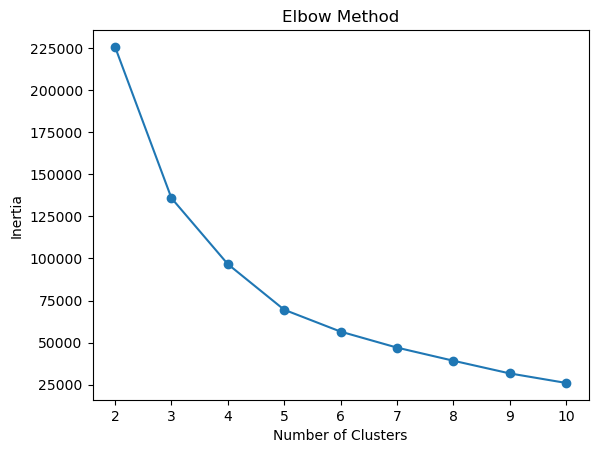

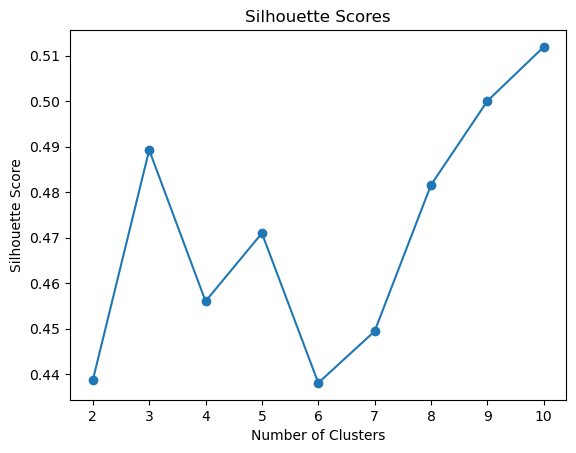

/opt/anaconda3/envs/a3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/jg/80c2vp4s2ljdkp2hrhlgv4dr0000gn/T/ipykernel_30314/3609907949.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uncertain_df['cluster'] = kmeans.fit_predict(data_for_clustering)


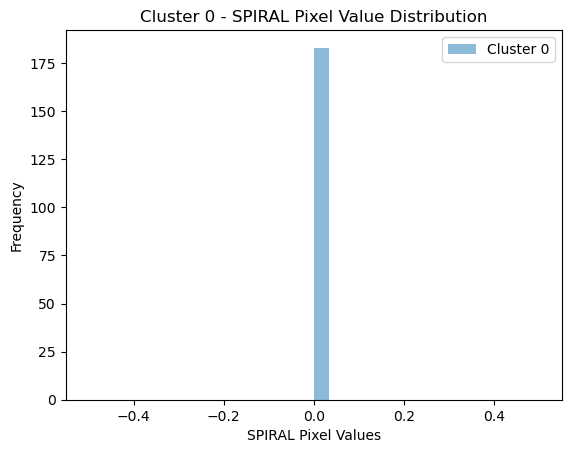

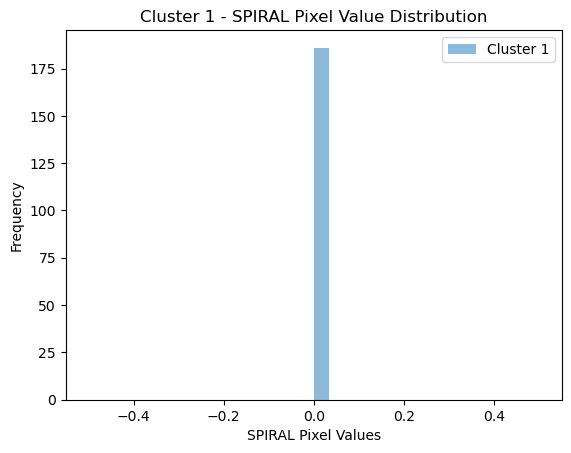

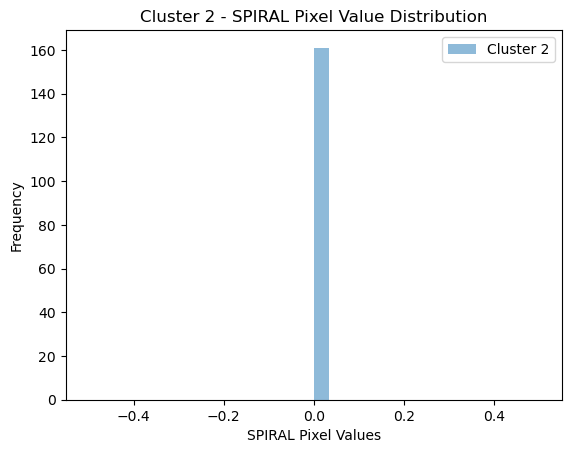

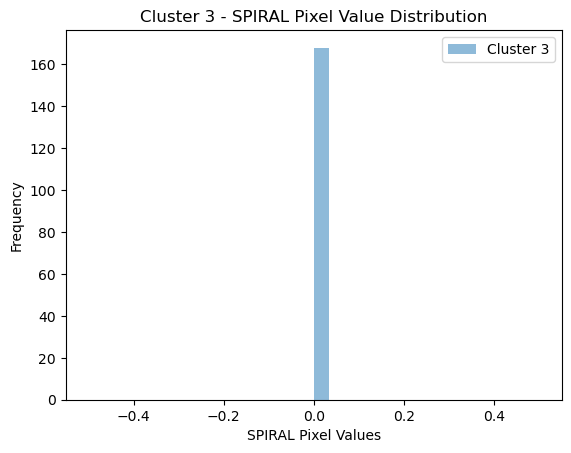

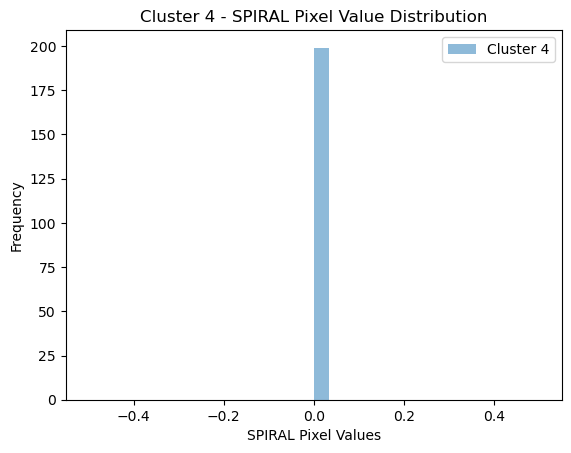

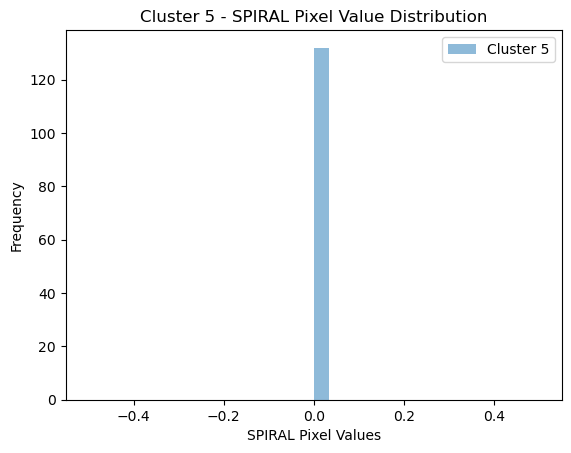

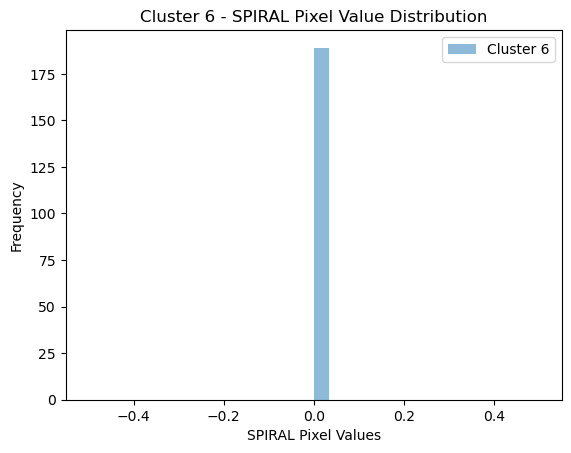

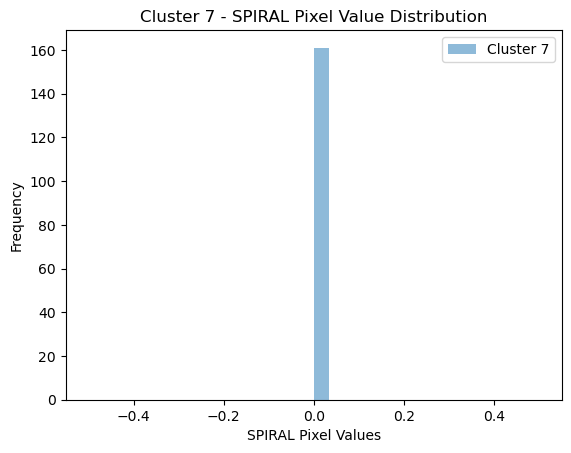

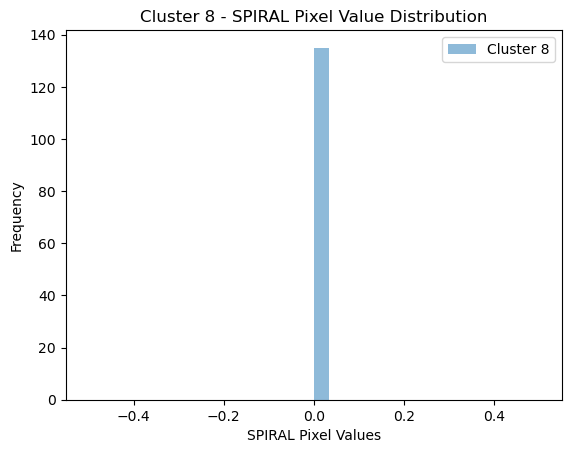

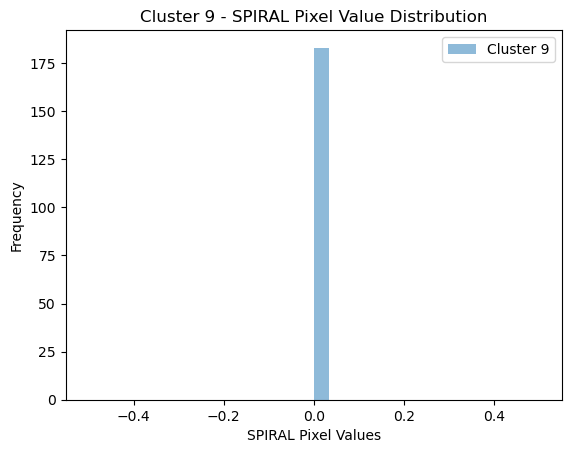

In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u

# # Load and process the data
# df = pd.read_csv('GalaxyZoo1_DR_table2.csv')
# cols = ['OBJID', 'RA', 'DEC', 'SPIRAL', 'ELLIPTICAL', 'UNCERTAIN']
# df_small = df[(df['P_EL_DEBIASED'] >= 0.8) | (df['P_CS_DEBIASED'] >= 0.8)][cols].head(10000)

# # Add degree columns
# df_small['degree'] = df_small.apply(lambda row: SkyCoord(ra=row.RA, dec=row.DEC, unit=(u.hourangle, u.deg)).to_string('decimal').split(' '), axis=1)
# df_small[['ra', 'dec']] = pd.DataFrame(df_small.degree.tolist(), index=df_small.index)

# Step 1: Filter for uncertain observations
uncertain_df = df_small[df_small['UNCERTAIN'] == 1]

# Step 2: Determine optimal k using the elbow method and silhouette score
data_for_clustering = uncertain_df[['ra', 'dec']]  # Adjust to include relevant features
inertia = []
silhouette_scores = []
range_k = range(2, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_for_clustering, kmeans.labels_))

# Plot elbow method
plt.plot(range_k, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Plot silhouette scores
plt.plot(range_k, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Choose optimal number of clusters based on the plots
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2

# Step 3: Cluster uncertain observations
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
uncertain_df['cluster'] = kmeans.fit_predict(data_for_clustering)

# Step 3a: Create histograms of pixel values for each cluster
for cluster in range(optimal_k):
    cluster_data = uncertain_df[uncertain_df['cluster'] == cluster]
    plt.hist(cluster_data['SPIRAL'], bins=30, alpha=0.5, label=f'Cluster {cluster}')
    plt.xlabel('SPIRAL Pixel Values')
    plt.ylabel('Frequency')
    plt.title(f'Cluster {cluster} - SPIRAL Pixel Value Distribution')
    plt.legend()
    plt.show()

# Step 4: Replace uncertain points with clustered data in original dataframe
df_small.loc[uncertain_df.index, 'cluster'] = uncertain_df['cluster']


In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import astropy.units as u
from astropy.coordinates import SkyCoord

# Load the dataset
df = pd.read_csv('GalaxyZoo1_DR_table2.csv')

# Define relevant columns
cols = ['OBJID', 'RA', 'DEC', 'SPIRAL', 'ELLIPTICAL', 'UNCERTAIN']

# Filter the dataframe based on the condition
df = df[(df['P_EL_DEBIASED'] >= 0.8) | (df['P_CS_DEBIASED'] >= 0.8)]
df_small = df[cols].head(10000)

# Convert RA and DEC to degrees
df_small['degree'] = df_small.apply(
    lambda row: SkyCoord(ra=row.RA, dec=row.DEC, unit=(u.hourangle, u.deg)).to_string('decimal').split(' '),
    axis=1
)
df_small[['ra', 'dec']] = pd.DataFrame(df_small.degree.tolist(), index=df_small.index)

# Step 1: Create a dataframe for the 1000 "uncertain" observations
uncertain_df = df_small[df_small['UNCERTAIN'] == 1].head(1000)

# Step 2: Run KMeans clustering
data_for_clustering = uncertain_df[['ra', 'dec']].astype(float)  # Ensure data is numeric

# Step 2a: Determine the optimal number of clusters using silhouette score
range_k = range(2, 11)  # Try between 2 and 10 clusters
silhouette_scores = []

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    silhouette_scores.append(silhouette_score(data_for_clustering, kmeans.labels_))

# Find the optimal number of clusters
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2

# Print the result
print(f"The optimal number of means for clustering the uncertain observations is {optimal_k}.")


/opt/anaconda3/envs/a3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/a3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/a3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/a3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/

The optimal number of means for clustering the uncertain observations is 8.


/opt/anaconda3/envs/a3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/a3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
uncertain_df.head()

,OBJID,RA,DEC,SPIRAL,ELLIPTICAL,UNCERTAIN,degree,ra,dec
5,587727180060098638,00:00:01.57,-09:29:40.3,0,0,1,"[0.00654167, -9.49453]",0.00654167,-9.49453
21,588015507658768548,00:00:05.54,-01:12:58.9,0,0,1,"[0.0230833, -1.21636]",0.0230833,-1.21636
82,587731185667080368,00:00:27.98,-00:26:53.5,0,0,1,"[0.116583, -0.448194]",0.116583,-0.448194
89,588015507658833996,00:00:30.88,-01:12:46.8,0,0,1,"[0.128667, -1.213]",0.128667,-1.213
133,588015509269446865,00:00:46.32,+00:03:54.9,0,0,1,"[0.193, 0.06525]",0.193,0.06525


In [19]:
import numpy as np

# Step 3: Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
uncertain_df['cluster'] = kmeans.fit_predict(data_for_clustering)

# Step 4: One-hot encode the cluster labels
# Create one-hot encoded columns
for cluster in range(optimal_k):
    uncertain_df[f'uncertain_{cluster}'] = np.where(uncertain_df['cluster'] == cluster, 1, 0)

# Drop the 'cluster' column as it is no longer needed
uncertain_df = uncertain_df.drop(columns=['cluster'])

# Display the updated dataframe
print(uncertain_df.head())


                  OBJID           RA          DEC  SPIRAL  ELLIPTICAL  \
5    587727180060098638  00:00:01.57  -09:29:40.3       0           0   
21   588015507658768548  00:00:05.54  -01:12:58.9       0           0   
82   587731185667080368  00:00:27.98  -00:26:53.5       0           0   
89   588015507658833996  00:00:30.88  -01:12:46.8       0           0   
133  588015509269446865  00:00:46.32  +00:03:54.9       0           0   

     UNCERTAIN                  degree          ra        dec  uncertain_0  \
5            1  [0.00654167, -9.49453]  0.00654167   -9.49453            0   
21           1   [0.0230833, -1.21636]   0.0230833   -1.21636            0   
82           1   [0.116583, -0.448194]    0.116583  -0.448194            0   
89           1      [0.128667, -1.213]    0.128667     -1.213            0   
133          1        [0.193, 0.06525]       0.193    0.06525            0   

     uncertain_1  uncertain_2  uncertain_3  uncertain_4  uncertain_5  \
5              0    

/opt/anaconda3/envs/a3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
uncertain_df.head()

,OBJID,RA,DEC,SPIRAL,ELLIPTICAL,UNCERTAIN,degree,ra,dec,uncertain_0,uncertain_1,uncertain_2,uncertain_3,uncertain_4,uncertain_5,uncertain_6,uncertain_7
5,587727180060098638,00:00:01.57,-09:29:40.3,0,0,1,"[0.00654167, -9.49453]",0.00654167,-9.49453,0,0,1,0,0,0,0,0
21,588015507658768548,00:00:05.54,-01:12:58.9,0,0,1,"[0.0230833, -1.21636]",0.0230833,-1.21636,0,0,0,0,1,0,0,0
82,587731185667080368,00:00:27.98,-00:26:53.5,0,0,1,"[0.116583, -0.448194]",0.116583,-0.448194,0,0,0,0,1,0,0,0
89,588015507658833996,00:00:30.88,-01:12:46.8,0,0,1,"[0.128667, -1.213]",0.128667,-1.213,0,0,0,0,1,0,0,0
133,588015509269446865,00:00:46.32,+00:03:54.9,0,0,1,"[0.193, 0.06525]",0.193,0.06525,0,0,0,0,1,0,0,0


In [21]:
# Step 5: Merge the updated uncertain_df back into df_small
# Create a DataFrame with the same columns as uncertain_df but with all zeros for the non-uncertain rows
non_uncertain_df = df_small[df_small['UNCERTAIN'] != 1].copy()

# Add columns for "uncertain_0" through "uncertain_7" with zeros
for cluster in range(optimal_k):
    non_uncertain_df[f'uncertain_{cluster}'] = 0

# Combine the non-uncertain rows with the updated uncertain_df
merged_df = pd.concat([non_uncertain_df, uncertain_df], axis=0)

# Ensure the final DataFrame contains the "SPIRAL" and "ELLIPTICAL" columns
final_df = merged_df[['OBJID', 'RA', 'DEC', 'SPIRAL', 'ELLIPTICAL', 'UNCERTAIN'] + [f'uncertain_{i}' for i in range(optimal_k)]]

# Display the updated dataframe
print(final_df.head())


                 OBJID           RA          DEC  SPIRAL  ELLIPTICAL  \
3   587730774962536596  00:00:01.38  +15:30:35.3       0           1   
7   587727223024189605  00:00:02.00  +15:41:49.8       1           0   
13  587727178449485858  00:00:03.33  -10:43:16.0       1           0   
15  587731187277693069  00:00:04.12  +00:45:07.9       0           1   
18  587727180596969574  00:00:04.60  -08:56:37.6       1           0   

    UNCERTAIN  uncertain_0  uncertain_1  uncertain_2  uncertain_3  \
3           0            0            0            0            0   
7           0            0            0            0            0   
13          0            0            0            0            0   
15          0            0            0            0            0   
18          0            0            0            0            0   

    uncertain_4  uncertain_5  uncertain_6  uncertain_7  
3             0            0            0            0  
7             0            0          

In [22]:
final_df = final_df.drop(columns=['UNCERTAIN'])


In [23]:
import os
import urllib.request
import urllib.parse
import datetime
import matplotlib.pyplot as plt
import tensorflow as tf

# Create directories for the 10 classes
base_dir = 'images'
categories = ['spiral', 'elliptical'] + [f'uncertain_{i}' for i in range(8)]
for category in categories:
    os.makedirs(f'{base_dir}/{category}', exist_ok=True)

# Define image parameters
url = 'https://skyservice.pha.jhu.edu/DR7/ImgCutout/getjpeg.aspx?'
sample_size = 100
download_count = {category: 0 for category in categories}

# Download images for each class
for index, row in final_df.iterrows():
    if all(count == sample_size for count in download_count.values()):
        break

    subfolder = ''
    if row['SPIRAL'] == 1:
        subfolder = 'spiral'
    elif row['ELLIPTICAL'] == 1:
        subfolder = 'elliptical'
    else:
        for i in range(8):
            if row[f'uncertain_{i}'] == 1:
                subfolder = f'uncertain_{i}'
                break

    if download_count[subfolder] < sample_size:
        download_count[subfolder] += 1
        params = {'ra': row['ra'], 'dec': row['dec'], 'scale': 0.2, 'width': 128, 'height': 128}
        image_url = url + urllib.parse.urlencode(params)
        image_name = f"{base_dir}/{subfolder}/{row['OBJID']}.jpg"
        urllib.request.urlretrieve(image_url, image_name)

# TensorFlow dataset preparation
batch_size = 32
img_height = 128
img_width = 128

train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Optimize dataset performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Define the CNN model
num_classes = 10  # Adjust for 10 classes

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
epochs = 10
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[tensorboard_callback]
)

# Plot training and validation metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


KeyError: 'ra'

In [24]:
final_df.head()

,OBJID,RA,DEC,SPIRAL,ELLIPTICAL,uncertain_0,uncertain_1,uncertain_2,uncertain_3,uncertain_4,uncertain_5,uncertain_6,uncertain_7
3,587730774962536596,00:00:01.38,+15:30:35.3,0,1,0,0,0,0,0,0,0,0
7,587727223024189605,00:00:02.00,+15:41:49.8,1,0,0,0,0,0,0,0,0,0
13,587727178449485858,00:00:03.33,-10:43:16.0,1,0,0,0,0,0,0,0,0,0
15,587731187277693069,00:00:04.12,+00:45:07.9,0,1,0,0,0,0,0,0,0,0
18,587727180596969574,00:00:04.60,-08:56:37.6,1,0,0,0,0,0,0,0,0,0


In [25]:
import os
import urllib.request
import urllib.parse
import datetime
import matplotlib.pyplot as plt
import tensorflow as tf

# Create directories for 10 classes
base_dir = 'images'
categories = ['spiral', 'elliptical'] + [f'uncertain_{i}' for i in range(8)]
for category in categories:
    os.makedirs(f'{base_dir}/{category}', exist_ok=True)

# Define image download parameters
url = 'https://skyservice.pha.jhu.edu/DR7/ImgCutout/getjpeg.aspx?'
sample_size = 100
download_count = {category: 0 for category in categories}

# Download images for each class
for index, row in final_df.iterrows():
    if all(count == sample_size for count in download_count.values()):
        break

    subfolder = ''
    if row['SPIRAL'] == 1:
        subfolder = 'spiral'
    elif row['ELLIPTICAL'] == 1:
        subfolder = 'elliptical'
    else:
        for i in range(8):
            if row[f'uncertain_{i}'] == 1:
                subfolder = f'uncertain_{i}'
                break

    if download_count[subfolder] < sample_size:
        download_count[subfolder] += 1
        params = {'ra': row['RA'], 'dec': row['DEC'], 'scale': 0.2, 'width': 128, 'height': 128}
        image_url = url + urllib.parse.urlencode(params)
        image_name = f"{base_dir}/{subfolder}/{row['OBJID']}.jpg"
        urllib.request.urlretrieve(image_url, image_name)

# TensorFlow dataset preparation
batch_size = 32
img_height = 128
img_width = 128

train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Optimize dataset performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Define the CNN model
num_classes = 10  # Adjust for 10 classes

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
epochs = 10
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[tensorboard_callback]
)

# Plot training and validation metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Found 1056 files belonging to 11 classes.
Using 845 files for training.
Found 1056 files belonging to 11 classes.
Using 211 files for validation.
Epoch 1/10


2024-11-25 18:42:18.159631: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of 10 which is outside the valid range of [0, 10).  Label values: 2 3 3 2 10 5 3 7 6 1 4 10 1 3 9 0 7 7 5 5 5 5 0 0 6 4 3 7 3 7 9 9
2024-11-25 18:42:18.159660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Received a label value of 10 which is outside the valid range of [0, 10).  Label values: 2 3 3 2 10 5 3 7 6 1 4 10 1 3 9 0 7 7 5 5 5 5 0 0 6 4 3 7 3 7 9 9
	 [[{{function_node __inference_one_step_on_data_24452}}{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 701, in start

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/opt/anaconda3/envs/a3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/opt/anaconda3/envs/a3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/opt/anaconda3/envs/a3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in dispatch_queue

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 523, in process_one

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 429, in dispatch_shell

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 767, in execute_request

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 429, in do_execute

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/var/folders/jg/80c2vp4s2ljdkp2hrhlgv4dr0000gn/T/ipykernel_30314/2282709889.py", line 99, in <module>

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/keras/src/trainers/trainer.py", line 398, in _compute_loss

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/keras/src/trainers/trainer.py", line 366, in compute_loss

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/keras/src/trainers/compile_utils.py", line 618, in __call__

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/keras/src/trainers/compile_utils.py", line 659, in call

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/keras/src/losses/losses.py", line 27, in call

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/opt/anaconda3/envs/a3/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 10 which is outside the valid range of [0, 10).  Label values: 2 3 3 2 10 5 3 7 6 1 4 10 1 3 9 0 7 7 5 5 5 5 0 0 6 4 3 7 3 7 9 9
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_24531]

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime

# Parameters for the dataset
batch_size = 32
img_height = 128
img_width = 128
num_classes = 10  # Updated for 10 classes

# Prepare the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Debug: Ensure correct class names and counts
print("Class Names:", train_ds.class_names)
assert len(train_ds.class_names) == num_classes, f"Expected {num_classes} classes, but found {len(train_ds.class_names)}."

# Optimize dataset performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Set up TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[tensorboard_callback]
)

# Extract accuracy and loss metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation metrics
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Found 1056 files belonging to 11 classes.
Using 845 files for training.
Found 1056 files belonging to 11 classes.
Using 211 files for validation.
Class Names: ['elliptical', 'spiral', 'uncertain', 'uncertain_0', 'uncertain_1', 'uncertain_2', 'uncertain_3', 'uncertain_4', 'uncertain_5', 'uncertain_6', 'uncertain_7']


AssertionError: Expected 10 classes, but found 11.

In [27]:
final_df.head()

,OBJID,RA,DEC,SPIRAL,ELLIPTICAL,uncertain_0,uncertain_1,uncertain_2,uncertain_3,uncertain_4,uncertain_5,uncertain_6,uncertain_7
3,587730774962536596,00:00:01.38,+15:30:35.3,0,1,0,0,0,0,0,0,0,0
7,587727223024189605,00:00:02.00,+15:41:49.8,1,0,0,0,0,0,0,0,0,0
13,587727178449485858,00:00:03.33,-10:43:16.0,1,0,0,0,0,0,0,0,0,0
15,587731187277693069,00:00:04.12,+00:45:07.9,0,1,0,0,0,0,0,0,0,0
18,587727180596969574,00:00:04.60,-08:56:37.6,1,0,0,0,0,0,0,0,0,0


Found 956 files belonging to 10 classes.
Using 765 files for training.
Found 956 files belonging to 10 classes.
Using 191 files for validation.
Class Names: ['elliptical', 'spiral', 'uncertain_0', 'uncertain_1', 'uncertain_2', 'uncertain_3', 'uncertain_4', 'uncertain_5', 'uncertain_6', 'uncertain_7']
Epoch 1/10


2024-11-25 18:51:19.064477: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 404ms/step - accuracy: 0.1029 - loss: 2.3034 - val_accuracy: 0.1832 - val_loss: 2.2973
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 336ms/step - accuracy: 0.1491 - loss: 2.2848 - val_accuracy: 0.1728 - val_loss: 2.2487
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 332ms/step - accuracy: 0.1631 - loss: 2.2286 - val_accuracy: 0.1832 - val_loss: 2.1990
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 334ms/step - accuracy: 0.2242 - loss: 2.1616 - val_accuracy: 0.1466 - val_loss: 2.1936
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 333ms/step - accuracy: 0.2033 - loss: 2.1595 - val_accuracy: 0.1885 - val_loss: 2.1630
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 346ms/step - accuracy: 0.2376 - loss: 2.0812 - val_accuracy: 0.2042 - val_loss: 2.2005
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 346ms/step - accuracy: 0.2513 - loss: 2.0217 - val_accuracy: 0.1990 - val_loss: 2.2431
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 344ms/step - accuracy: 0.2762 - loss: 1.9495 - val_accuracy: 0.1990 - val

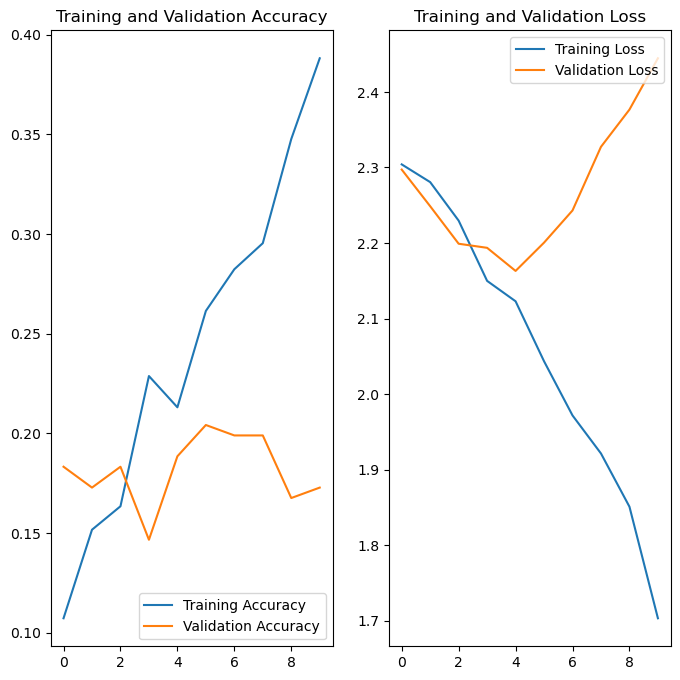

In [29]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime

# Parameters for the dataset
batch_size = 32
img_height = 128
img_width = 128
num_classes = 10  # Expected number of classes: spiral, elliptical, uncertain_0 to uncertain_7

# Verify and clean class directories
expected_classes = ['spiral', 'elliptical'] + [f'uncertain_{i}' for i in range(8)]
data_dir = "images"  # Update this to your actual data directory

# Validate directories
actual_classes = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]
unexpected_classes = set(actual_classes) - set(expected_classes)

if unexpected_classes:
    raise ValueError(f"Unexpected classes found: {unexpected_classes}. Please ensure only these directories exist: {expected_classes}")

# Prepare the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Ensure correct class names and counts
print("Class Names:", train_ds.class_names)
assert len(train_ds.class_names) == num_classes, f"Expected {num_classes} classes, but found {len(train_ds.class_names)}."

# Optimize dataset performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Set up TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[tensorboard_callback]
)

# Extract accuracy and loss metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation metrics
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Found 756 files belonging to 8 classes.
Using 605 files for training.
Found 756 files belonging to 8 classes.
Using 151 files for validation.
Class Names: ['uncertain_0', 'uncertain_1', 'uncertain_2', 'uncertain_3', 'uncertain_4', 'uncertain_5', 'uncertain_6', 'uncertain_7']
Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 418ms/step - accuracy: 0.1582 - loss: 2.0991 - val_accuracy: 0.0927 - val_loss: 2.0771
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 364ms/step - accuracy: 0.1296 - loss: 2.0774 - val_accuracy: 0.0728 - val_loss: 2.0866
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 363ms/step - accuracy: 0.1531 - loss: 2.0739 - val_accuracy: 0.0728 - val_loss: 2.0895
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 356ms/step - accuracy: 0.1529 - loss: 2.0674 - val_accuracy: 0.0728 - val_loss: 2.0811
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 375ms/step - accuracy: 0.1788 - loss: 2.0536 - val_accuracy: 0.0728 - val_loss: 2.0873
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 354ms/step - accuracy: 0.1894 - loss: 2.04

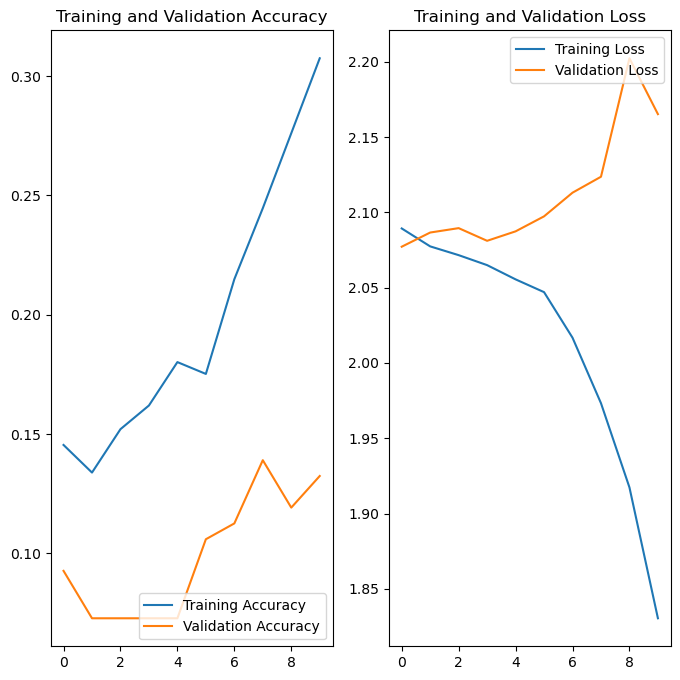

In [31]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime

# Parameters for the dataset
batch_size = 32
img_height = 128
img_width = 128
num_classes = 8  # Only uncertain_0 to uncertain_7

# Set the data directory for uncertain classes
data_dir = "images_uncertain"  # Update this to your actual data directory containing uncertain_0 to uncertain_7

# Expected classes for uncertain_df
expected_classes = [f'uncertain_{i}' for i in range(8)]

# Validate directories
actual_classes = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]
unexpected_classes = set(actual_classes) - set(expected_classes)

if unexpected_classes:
    raise ValueError(f"Unexpected classes found: {unexpected_classes}. Please ensure only these directories exist: {expected_classes}")

# Prepare the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Ensure correct class names and counts
print("Class Names:", train_ds.class_names)
assert len(train_ds.class_names) == num_classes, f"Expected {num_classes} classes, but found {len(train_ds.class_names)}."

# Optimize dataset performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Set up TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[tensorboard_callback]
)

# Extract accuracy and loss metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation metrics
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [32]:
import pandas as pd
from sklearn.cluster import KMeans
import astropy.units as u
from astropy.coordinates import SkyCoord

# Load the dataset
df = pd.read_csv('GalaxyZoo1_DR_table2.csv')

# Define relevant columns
cols = ['OBJID', 'RA', 'DEC', 'SPIRAL', 'ELLIPTICAL', 'UNCERTAIN']

# Filter the dataframe based on the condition
df = df[(df['P_EL_DEBIASED'] >= 0.8) | (df['P_CS_DEBIASED'] >= 0.8)]
df_small = df[cols].head(10000)

# Convert RA and DEC to degrees
df_small['degree'] = df_small.apply(
    lambda row: SkyCoord(ra=row.RA, dec=row.DEC, unit=(u.hourangle, u.deg)).to_string('decimal').split(' '),
    axis=1
)
df_small[['ra', 'dec']] = pd.DataFrame(df_small.degree.tolist(), index=df_small.index)

# Step 1: Create a dataframe for the 1000 "uncertain" observations
uncertain_df = df_small[df_small['UNCERTAIN'] == 1].head(1000)

# Step 2: Run KMeans clustering with 2 clusters
data_for_clustering = uncertain_df[['ra', 'dec']].astype(float)  # Ensure data is numeric

# Apply KMeans with n_clusters=2
kmeans = KMeans(n_clusters=2, random_state=42)
uncertain_df['cluster'] = kmeans.fit_predict(data_for_clustering)

# Step 3: Convert clusters to one-hot encoded labels
uncertain_df['uncertain_0'] = (uncertain_df['cluster'] == 0).astype(int)
uncertain_df['uncertain_1'] = (uncertain_df['cluster'] == 1).astype(int)

# Drop the temporary 'cluster' column
uncertain_df2 = uncertain_df.drop(columns=['cluster'])

# Display the new dataframe
print(uncertain_df2.head())


                  OBJID           RA          DEC  SPIRAL  ELLIPTICAL  \
5    587727180060098638  00:00:01.57  -09:29:40.3       0           0   
21   588015507658768548  00:00:05.54  -01:12:58.9       0           0   
82   587731185667080368  00:00:27.98  -00:26:53.5       0           0   
89   588015507658833996  00:00:30.88  -01:12:46.8       0           0   
133  588015509269446865  00:00:46.32  +00:03:54.9       0           0   

     UNCERTAIN                  degree          ra        dec  uncertain_0  \
5            1  [0.00654167, -9.49453]  0.00654167   -9.49453            1   
21           1   [0.0230833, -1.21636]   0.0230833   -1.21636            1   
82           1   [0.116583, -0.448194]    0.116583  -0.448194            1   
89           1      [0.128667, -1.213]    0.128667     -1.213            1   
133          1        [0.193, 0.06525]       0.193    0.06525            1   

     uncertain_1  
5              0  
21             0  
82             0  
89             0

/opt/anaconda3/envs/a3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
import os
import shutil
import urllib.request
import urllib.parse

# Define the new image directory
base_dir = "images_uncertain2"
os.makedirs(os.path.join(base_dir, "uncertain_0"), exist_ok=True)
os.makedirs(os.path.join(base_dir, "uncertain_1"), exist_ok=True)

# Base URL for image retrieval
url = 'https://skyservice.pha.jhu.edu/DR7/ImgCutout/getjpeg.aspx?'

# Iterate through uncertain_df2 and download/sort images
for index, row in uncertain_df2.iterrows():
    # Determine subfolder based on the cluster label
    if row['uncertain_0'] == 1:
        subfolder = 'uncertain_0'
    elif row['uncertain_1'] == 1:
        subfolder = 'uncertain_1'
    else:
        continue  # Skip if not part of any cluster (this shouldn't happen)

    # Construct image URL
    params = {'ra': row['ra'], 'dec': row['dec'], 'scale': 0.2, 'width': 128, 'height': 128}
    image_url = url + urllib.parse.urlencode(params)
    
    # Save the image to the appropriate folder
    image_path = os.path.join(base_dir, subfolder, f"{row['OBJID']}.jpg")
    urllib.request.urlretrieve(image_url, image_path)

print(f"Images sorted into {base_dir}/uncertain_0 and {base_dir}/uncertain_1.")


Images sorted into images_uncertain2/uncertain_0 and images_uncertain2/uncertain_1.


Found 1000 files belonging to 2 classes.
Using 800 files for training.
Found 1000 files belonging to 2 classes.
Using 200 files for validation.
Class Names: ['uncertain_0', 'uncertain_1']
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 309ms/step - accuracy: 0.6401 - loss: 0.6473 - val_accuracy: 0.7200 - val_loss: 0.5763
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 298ms/step - accuracy: 0.6540 - loss: 0.6227 - val_accuracy: 0.7200 - val_loss: 0.5793
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 290ms/step - accuracy: 0.6642 - loss: 0.6099 - val_accuracy: 0.7200 - val_loss: 0.5656
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 290ms/step - accuracy: 0.6601 - loss: 0.5845 - val_accuracy: 0.7200 - val_loss: 0.5611
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 324ms/step - accuracy: 0.6874 - loss: 0.5631 - val_accuracy: 0.7250 - val_loss: 0.5753
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 287ms/step - accuracy: 0.6953 - loss: 0.5447 - val_accuracy: 0.7300 - val_loss: 0.5805
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 292

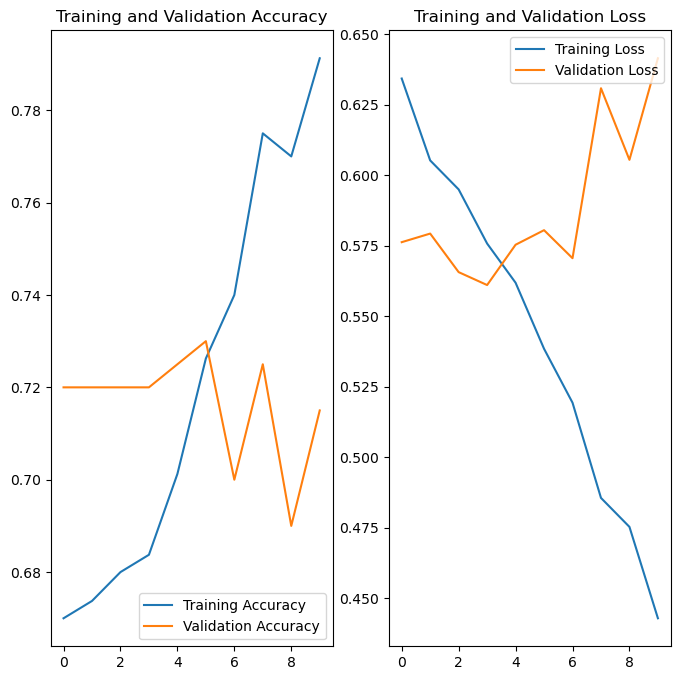

In [38]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime

# Parameters for the dataset
batch_size = 32
img_height = 128
img_width = 128
num_classes = 2  # Only uncertain_0 and uncertain_1

# Set the data directory for uncertain_df2
data_dir = "images_uncertain2"  # Update this to your actual data directory containing uncertain_0 and uncertain_1

# Expected classes for uncertain_df2
expected_classes = ['uncertain_0', 'uncertain_1']

# Validate directories
actual_classes = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]
unexpected_classes = set(actual_classes) - set(expected_classes)

if unexpected_classes:
    raise ValueError(f"Unexpected classes found: {unexpected_classes}. Please ensure only these directories exist: {expected_classes}")

# Prepare the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Ensure correct class names and counts
print("Class Names:", train_ds.class_names)
assert len(train_ds.class_names) == num_classes, f"Expected {num_classes} classes, but found {len(train_ds.class_names)}."

# Optimize dataset performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Set up TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[tensorboard_callback]
)

# Extract accuracy and loss metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation metrics
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

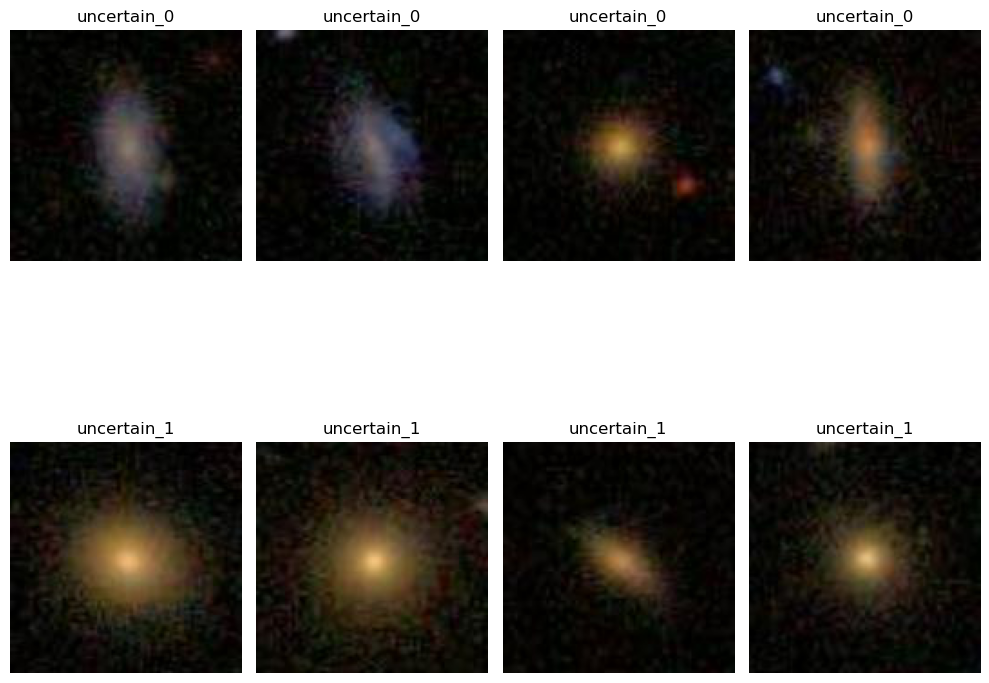

In [39]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.utils import load_img, img_to_array

# Set the directory paths
base_dir = "images_uncertain2"
categories = ["uncertain_0", "uncertain_1"]

# Number of images to display per category
num_samples = 4

# Initialize a figure
plt.figure(figsize=(10, 10))

# Iterate through the categories and display images
image_index = 1
for category in categories:
    category_dir = os.path.join(base_dir, category)
    # Get a list of image files in the directory
    image_files = os.listdir(category_dir)[:num_samples]  # Take the first `num_samples` images
    
    for image_file in image_files:
        # Load the image
        img_path = os.path.join(category_dir, image_file)
        img = load_img(img_path, target_size=(128, 128))  # Resize for uniformity
        
        # Display the image
        ax = plt.subplot(2, num_samples, image_index)
        plt.imshow(img)
        plt.title(category)
        plt.axis("off")
        image_index += 1

plt.tight_layout()
plt.show()
